### Exploring Credit Risks

This activity is another open exploration of a dataset using both cleaning methods and visualizations.  The data describes customers as good or bad credit risks based on a small set of features specified below.  Your task is to create a Jupyter notebook with an exploration of the data using both your `pandas` cleaning and analysis skills and your visualization skills using `matplotlib`, `seaborn`, and `plotly`.  Your final notebook should be formatted with appropriate headers and markdown cells with written explanations for the code that follows. 

Post your notebook file in Canvas, as well as a brief (3-4 sentence) description of what you found through your analysis. Respond to your peers with reflections on thier analysis. 

-----


##### Data Description

```
1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/dataset_31_credit-g.csv')
df.loc[:,df.dtypes==object] = df.loc[:,df.dtypes==object].apply(lambda s:s.str.replace("'", ""))

In [3]:
df.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,none,...,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,none,...,life insurance,53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,existing paid,used car,6948,<100,1<=X<4,2,male single,none,...,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
8,no checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,none,...,real estate,61,none,own,1,unskilled resident,1,none,yes,good
9,0<=X<200,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,none,...,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

### Age distribution

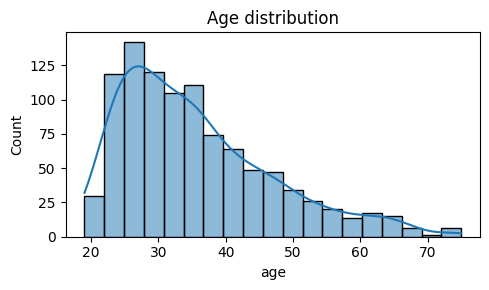

In [5]:
plt.figure(figsize=(5,3))
sns.histplot(df, x="age", kde=True)

plt.title('Age distribution')
plt.tight_layout()
plt.show()

### Credit amount distribution

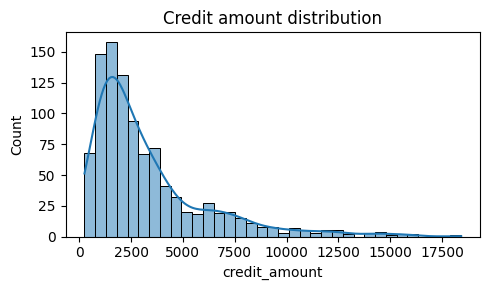

In [6]:
plt.figure(figsize=(5,3))
sns.histplot(df, x="credit_amount", kde=True)

plt.title('Credit amount distribution')
plt.tight_layout()
plt.show()

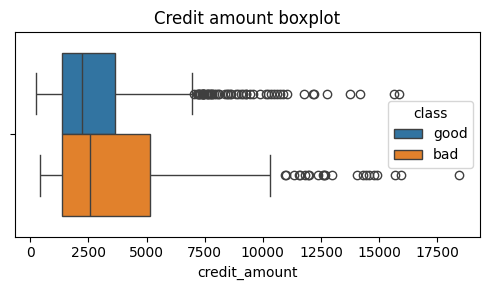

In [7]:
plt.figure(figsize=(5,3))
sns.boxplot(df, x="credit_amount", hue="class")

plt.title('Credit amount boxplot')
plt.tight_layout()
plt.show()

### Checking and savings account status

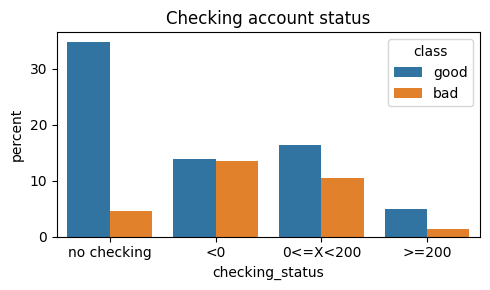

In [8]:
plt.figure(figsize=(5,3))
sns.countplot(df, x="checking_status", order=['no checking', '<0', '0<=X<200', '>=200'], hue="class", stat='percent')
plt.title('Checking account status')
plt.tight_layout()
plt.show()

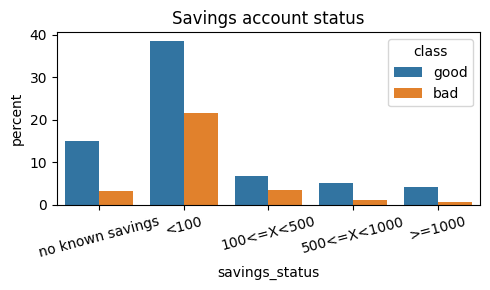

In [9]:
plt.figure(figsize=(5,3))
sns.countplot(df, x="savings_status", order=['no known savings', '<100', '100<=X<500' , '500<=X<1000', '>=1000'], hue="class", stat='percent')
plt.title('Savings account status')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Credit history vs Credit class

In [10]:
df_history_vs_class = pd.DataFrame(df['credit_history'].value_counts())
df_history_vs_class['good'] = df[df['class'] == 'good']['credit_history'].value_counts()
df_history_vs_class['ratio'] = df_history_vs_class['good'] / df_history_vs_class['count']
df_history_vs_class = df_history_vs_class.reset_index()

In [11]:
df_history_vs_class

,credit_history,count,good,ratio
0,existing paid,530,361,0.681132
1,critical/other existing credit,293,243,0.829352
2,delayed previously,88,60,0.681818
3,all paid,49,21,0.428571
4,no credits/all paid,40,15,0.375000


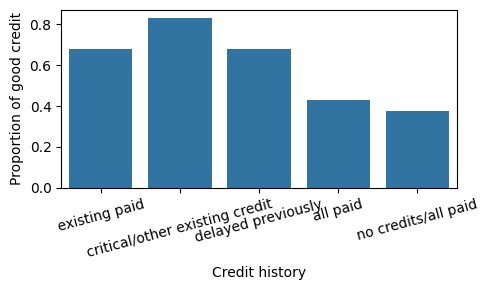

In [12]:
plt.figure(figsize=(5,3))

sns.barplot(df_history_vs_class, x='credit_history', y='ratio')
plt.xticks(rotation=15)
plt.ylabel('Proportion of good credit')
plt.xlabel('Credit history')
plt.tight_layout()
plt.show()